# Tutorial on Toy Generation  to be used for limit production

# In a nutshell:  Neymann construction with likelihood ratio

## Some definitions:
- **mu** is our parameter of interest, the signal strenght, it can be considered as equal to the number of signal events. Altough there is a small difference (out of the scope of this tutorial).
- **q_mu** is the test statistic, the likelihood ratio. This is a function of the "tested" value of **mu**.
- **H_mu** is the signal hypothesis with a signal strenght **mu**.
- **H_0** is the null hypothesis, background only.

## General Idea
Porduce limits with the Neymann construction method. Typically this means that one wants to reject the signal hypothesis **H_mu**  in favour of the null, **H_0**. The whole game is then to find the value of **mu** for which the **H_mu** is rejected at 90% CL. To do so one needs the distibution of the test statistic **q_{mu}** under signal hypothesis **H_mu** (assuming that **H_mu** is true).
The whole procedure is quite involved, but can be divided in a few points:

**Produce the 90% quantiles curve** 
- Produce several MC toy datasets related to a specific hypothesis **mu**.
- **Fit** those datastes, meaning, compute the **q_mu**, testing the same exact **mu** for under which the toys are generated
- Now you have many **q_mu** values for a given **mu** test and the related hypothesis. So you have the distro of **q_mu** under the hypothesis **H_mu**. So you can compute the 90% quantile of that distribution **q_mu_90**, or in other words the value of **q_mu** that correspond to a p-value of 10%.
- Now you can repeat the procedure for a prefixed set of values of **mu** and obtain a set of **q_mu_90** points.
- Interpolate the latter set of points and you'll have a curve describing the evolution of the 90% quantile of the test statistic **q_mu_90** as a function of the tested value of **mu**.
- Now you can use that curve to compute the limits.

**Compute the limits or the sensitivity**
- Given a dataset, that can be real data (for real limit) or toy bkg only data (for sensitivity), one compute the value of **q_mu** for a given **mu**.
- Check that value againts the **q_mu_90** curve to find if its p-value is larger than 10%, if yes that **mu** hypothesis is excluded.
- Find the value of **mu** for which the likelihood ratio curve **q_mu** intersect the **q_mu_90** curve, that is the limit at 90% CL.
- If you are computing the real limmit then you are done, if you are computing sensitivity then repeat these last 2 points for many toy datasets untill you'll get the distribution of limits under the **H_0**. Find the median and 1-2sigma of that distro.

# The focus of the tutorial
This tutorial is devoted to show you how to use Xephyr classes to produce MC pseudo-datasets from background and signal models, so to generate toys under any of the **H_mu** hypothesis. We will show that it is very easy to do so once you have previously defined a likelihood.


## The Setup 
First of all I suggest you to produce a single compilable macro that contains the likelihood you want to use, you can find in other tutorial how to define the likelihood [here](https://xenon1t.github.io/Xephyr/docs/tutorials.html). The idea of this macro is to define a function that you can use to retrieve the likelihood, so that you have it defined in one place only. You can get inspiration on how to write this function from [here](https://github.com/XENON1T/SR1Results/blob/master/StatisticalAnalyses/xephyr_sr1_likelihood/src/).


This tutorial depends on the likelihood definition of SR1,  so you need to download the SR1 repository.
```bash
cd XEPHYR_DIR
git clone git@github.com:XENON1T/SR1Results.git SR1
```

# Part 1) Intro

In [1]:
.x ../loadXephyr.C



      =================== Welcome to Xephyr =====================
       Version 6.0 dated 10-Oct-2017, compiled with ROOT 6.14/00



Info in <TUnixSystem::ACLiC>: creating shared library /home/pan/work/XEPHYR/Xephyr/src/XeLikelihoods_cxx.so


(int) 0


In [2]:
// add path to include files to ROOT (in the file I'm going to load there are some Xephyr includes) 
gInterpreter->AddIncludePath("../src");  // in this case is just XEPHYR src from next dir.

Now we load the SR1 likelihood macro, where the definition of the likelihood is.

In [3]:
.L ../../SR1/StatisticalAnalyses/xephyr_sr1_likelihood/src/likelihoodDef.cxx

In [4]:
double mass = 50.; // GeV
int likelihood_type = 0;  // [0=inner egg, 1= U volume, 2 = Wall volume]

// The whole SR1 likelihood definition now is in this object 
pdfLikelihood *likeHood = getTheLikelihood_SR1( mass, likelihood_type ); 

// Initialize the likelihood, you always need to call this after you load all PDFs and nuisance parameters
likeHood->initialize();

// Set parameter of interest constrained positive (not default), because now we want to produce toys
likeHood->getPOI()->setMinimum(0.);


pdfComponent::Constructor - INFO : Reading file /home/pan/work/XEPHYR/SR1/StatisticalAnalyses/inputs_for_likelihood/lax_1.5.1_egg/sliced_2d_templates/ERBackgroundModel_Stitched_SR1_RunSourceCombinedFit180420.root
pdfComponent::Constructor - INFO : Reading file /home/pan/work/XEPHYR/SR1/StatisticalAnalyses/inputs_for_likelihood/lax_1.5.1_egg/sliced_2d_templates/Background_wall_ac_templates_v6_inegg_bin_SR1_2018-04-30.root
pdfComponent::Constructor - INFO : Reading file /home/pan/work/XEPHYR/SR1/StatisticalAnalyses/inputs_for_likelihood/lax_1.5.1_egg/sliced_2d_templates/Background_wall_ac_templates_v6_inegg_bin_SR1_2018-04-30.root
pdfComponent::Constructor - INFO : Reading file /home/pan/work/XEPHYR/SR1/StatisticalAnalyses/inputs_for_likelihood/lax_1.5.1_egg/sliced_2d_templates/RadiogenicNRBackgroundModel_SR1_RunSourceCombined180420.root
pdfComponent::Constructor - INFO : Reading file /home/pan/work/XEPHYR/SR1/StatisticalAnalyses/inputs_for_likelihood/lax_1.5.1_egg/sliced_2d_templates/Ra

#### Explaination of printout above:
ok, there is a lot of print out:
- The first block tells you what file have been loaded as PDF
- The second block list the loaded bkg component with their names (SR1 has stupid names) and it says if the bkg will have a safeguard uncertainty or not.
- The third block tells you which nuissance parameters are added to the likelihood and to which component they belong

In [5]:
TString treeName = "treeName";
TString pathOfFile = "./";
ToyGenerator toy(treeName,pathOfFile);  // (string 'name', string 'out dir')

In [6]:
toy.setLikelihood(likeHood);

In [7]:
toy.setSeed(127);    // you should change the seed as a function of wimp mass and injected signal strenght

In [8]:
toy.randomizeNuissanceParameter();

ToyGenerator::randomizeNuissanceParameter - INFO : Randomizing parameters:
ToyGenerator:: - INFO : Skipping paramater: Sigma
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Of interest        0                 
  1 CNNSscale0           Nuisance       -0.97                 
  2 RadioscaleNX0        Nuisance           1                 
  3 Radioscale0          Nuisance        -1.3                 
  4 ACscale0             Nuisance       -0.68                 
  5 Wallscale0           Nuisance        0.38                 
  6 ERscale0             Free           0.061                 
  7 _py0_                Free            0.95                 
  8 _rf0_                Free           -0.85                 
  9 SignalScale0         Nuisance        -1.7                 


#### now we generate data:
ToyGenerator::generateData(double mu, int N) ---> mu = signal multiplier,  N = number of datasets

In [9]:
toy.generateData(5,10);           // generated science data: generateData(double mu, int N, bool randomizeNP = true);

toy.setAverageCalibrationEvents(10000);
//toy.generateCalibration(10);      // generate calibration data: generateCalibration(int N, bool randomizeNP = true);

ToyGenerator::randomizeNuissanceParameter - INFO : Randomizing parameters:
ToyGenerator:: - INFO : Skipping paramater: Sigma
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Of interest        0                 
  1 CNNSscale0           Nuisance         1.6                 
  2 RadioscaleNX0        Nuisance       -0.12                 
  3 Radioscale0          Nuisance         1.6                 
  4 ACscale0             Nuisance       -0.51                 
  5 Wallscale0           Nuisance        0.61                 
  6 ERscale0             Free           0.015                 
  7 _py0_                Free           -0.43                 
  8 _rf0_                Free             1.6                 
  9 SignalScale0         Nuisance         2.3                 
ToyGenerator::randomizeNuissanceParameter - INFO : Randomizing parameters:
ToyGenerator:: - INFO : Skipping paramater: Sigma
 Id Name                 Type         Curr

### Let's have a look at what we've created
In the specified directory you'll get a file named with your specified "TreeName" with N trees inside.
Each tree contains a TList of the parameter values that have been extracted and considered as the truth for that toy dataset and can be accessed with TTree::GetUserInfo() method.

The Trees contain 3 branches: cs1, cs2 and type. Type is a string that define the type of the specific event, and reports the name of the histogram from which has been extracted.

In [10]:
TFile *file = TFile::Open(pathOfFile + treeName + ".root");  // science data
//TFile *file = TFile::Open(pathOfFile + treeName + "_Cal.root");  // calibration data
file->ls();

TFile**		./treeName.root	
 TFile*		./treeName.root	
  KEY: TTree	treeName_0;1	generated toy data
  KEY: TTree	treeName_1;1	generated toy data
  KEY: TTree	treeName_2;1	generated toy data
  KEY: TTree	treeName_3;1	generated toy data
  KEY: TTree	treeName_4;1	generated toy data
  KEY: TTree	treeName_5;1	generated toy data
  KEY: TTree	treeName_6;1	generated toy data
  KEY: TTree	treeName_7;1	generated toy data
  KEY: TTree	treeName_8;1	generated toy data
  KEY: TTree	treeName_9;1	generated toy data


In [11]:
TTree *tree = (TTree*)file->Get(treeName+"_1"); // science data
//TTree *tree = (TTree*)file->Get(treeName+"_Cal1");  // calibration

In [12]:
TList *l = tree->GetUserInfo();  // this is a list stored in TTree
l->Print();                      // let's print the params for one tree, they are stored in TParameter class type.

Collection name='UserInfo', class='TList', size=10
  TParameter<double>	Sigma = 5
  TParameter<double>	CNNSscale0 = -0.592597
  TParameter<double>	RadioscaleNX0 = 0.977446
  TParameter<double>	Radioscale0 = 1.04343
  TParameter<double>	ACscale0 = 0.195928
  TParameter<double>	Wallscale0 = -0.359168
  TParameter<double>	ERscale0 = 0.352575
  TParameter<double>	_py0_ = -0.797018
  TParameter<double>	_rf0_ = -1.92662
  TParameter<double>	SignalScale0 = -1.09144


In [13]:
tree->Print();

******************************************************************************
*Tree    :treeName_1: generated toy data                                     *
*Entries :      380 : Total =           14676 bytes  File  Size =       6407 *
*        :          : Tree compression factor =   2.07                       *
******************************************************************************
*Br    0 :cs1       : cs1/F                                                  *
*Entries :      380 : Total  Size=       2073 bytes  File Size  =       1596 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :cs2       : cs2/F                                                  *
*Entries :      380 : Total  Size=       2073 bytes  File Size  =       1596 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.00     *
*...................................................

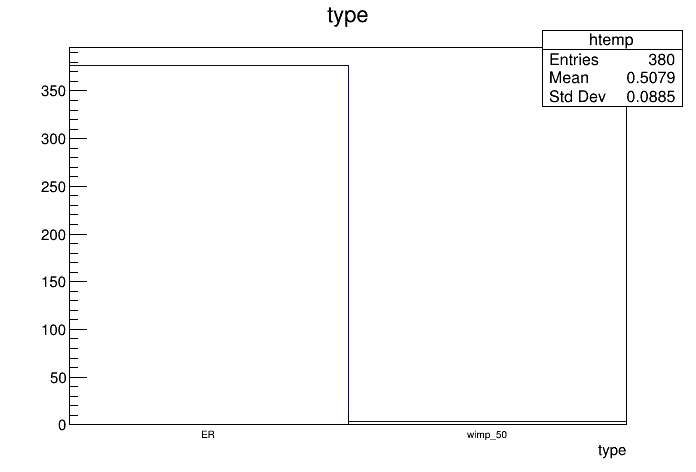

In [14]:
TCanvas *c2 = new TCanvas();
tree->Draw("type");
c2->Draw();

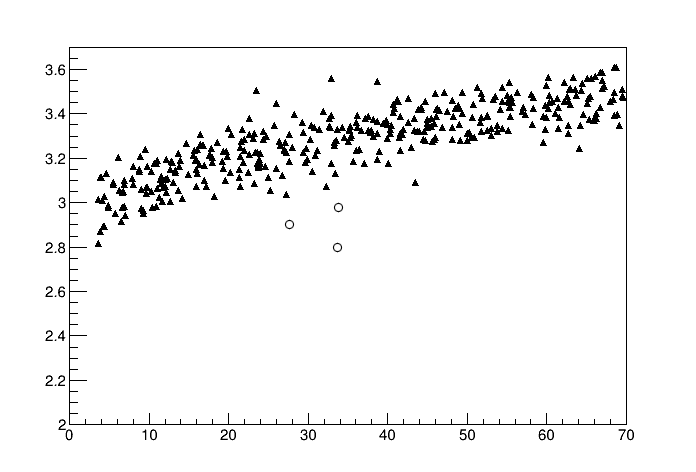

In [15]:
TCanvas *c4 = new TCanvas();
gStyle->SetOptTitle(kFALSE);
gStyle->SetOptStat(0);

TH2F *h = new TH2F("h","signal",100,0,70,100,2,3.7);
h->SetMarkerStyle(kOpenCircle);
tree->Draw("cs2:cs1>>h","type==\"wimp_50\"");  // this is actually log10(cs2)
TH2F *h2 = new TH2F("h2","ER bkg",100,0,70,100,2,3.7);
h2->SetMarkerStyle(kFullTriangleUp);
tree->Draw("cs2:cs1>>h2","type==\"ER\"");  // "hband" is the unfortunate name of the ER bkg component, but hey that's the name of the histo...
h->Draw("P");
h2->Draw("SAME P");
//gPad->BuildLegend();
c4->Draw();

In [17]:
likeHood->printEventSummary();



--------------Event Summary------------------
PdfComponent Name 	Events
CNNS 	 0.0330
RadiogenicNX 	 0.0213
RadiogenicNR 	 0.1800
AC 	 0.3075
Wall 	 0.0219
ER 	 323.1444
Signal 	 76.4627
